In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("films.csv")
data.head()

,gender,is_28+,employment_status,watching
0,M,0,student,yes
1,M,1,working,yes
2,F,0,working,yes
3,F,0,student,no
4,M,1,working,yes


In [4]:
data['watching'].value_counts()

yes    26
no     24
Name: watching, dtype: int64

In [5]:
x = data.loc[data['gender'] == 'M', ['watching']]

In [6]:
x['watching'].value_counts()

no     16
yes    12
Name: watching, dtype: int64

In [7]:
pd.crosstab(index=data['gender'], columns=data['watching'])

watching,no,yes
gender,,
F,8,14
M,16,12


In [8]:
P_fw = 14 / 22
P_mw = 12 / 28
P_mw, P_fw

(0.42857142857142855, 0.6363636363636364)

In [9]:
G_mw = 2 * P_mw * (1 - P_mw)
G_fw = 2 * P_fw * (1 - P_fw)
G_mw, G_fw

(0.48979591836734687, 0.4628099173553719)

In [10]:
W_gini_g = (28 / 50 * G_mw) + (22 / 50 * G_fw)
W_gini_g

0.47792207792207797

In [11]:
pd.crosstab(index=data['is_28+'], columns=data['watching'])

watching,no,yes
is_28+,,
0,11,17
1,13,9


In [12]:
P_1w = 9 / 22
P_0w = 17 / 28
P_1w, P_0w

(0.4090909090909091, 0.6071428571428571)

In [13]:
G_1w = 2 * P_1w * (1 - P_1w)
G_0w = 2 * P_0w * (1 - P_0w)
G_1w, G_0w

(0.48347107438016523, 0.4770408163265306)

In [14]:
W_gini_age = (22 / 50 * G_1w) + (28 / 50 * G_0w)
W_gini_age

0.4798701298701299

In [15]:
pd.crosstab(index=data['employment_status'], columns=data['watching'])

watching,no,yes
employment_status,,
student,5,4
working,19,22


In [16]:
P_ww = 22 / 41
P_sw = 4 / 9
P_ww, P_sw

(0.5365853658536586, 0.4444444444444444)

In [17]:
G_ww = 2 * P_ww * (1 - P_ww)
G_sw = 2 * P_sw * (1 - P_sw)
G_ww, G_sw

(0.4973230220107079, 0.49382716049382713)

In [18]:
W_gini_emp = (41 / 50 * G_ww) + (9 / 50 * G_sw)
W_gini_emp

0.4966937669376693

In [19]:
E_m = -P_mw * np.log2(P_mw) - (1-P_mw) * np.log2(1-P_mw)
E_f = -P_fw * np.log2(P_fw) - (1-P_fw) * np.log2(1-P_fw)
E_m, E_f

(0.9852281360342515, 0.9456603046006401)

In [20]:
E_g = (28 / 50 * E_m) + (22 / 50 * E_f)
E_g

0.9678182902034626

In [21]:
E_w = -(26/50)*np.log2(26/50) - (24/50)*np.log2(24/50)
E_w

0.9988455359952018

In [22]:
I_G = E_w - E_g
I_G

0.03102724579173921

In [23]:
dt = DecisionTreeClassifier()

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le_g = LabelEncoder()
le_g.fit(data['gender'])
data['gender'] = le_g.transform(data['gender'])

In [26]:
le_emp = LabelEncoder()
le_emp.fit(data['employment_status'])
data['employment_status'] = le_emp.transform(data['employment_status'])

In [27]:
data.head()

,gender,is_28+,employment_status,watching
0,1,0,0,yes
1,1,1,1,yes
2,0,0,1,yes
3,0,0,0,no
4,1,1,1,yes


In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.3, random_state=1)

In [32]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
p = dt.predict(xtest)
p

array(['yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'yes', 'yes'], dtype=object)

In [34]:
accuracy_score(p, ytest)

0.7333333333333333

In [35]:
import graphviz

In [36]:
import pydotplus

In [37]:
from IPython.display import Image

In [38]:
from sklearn import tree

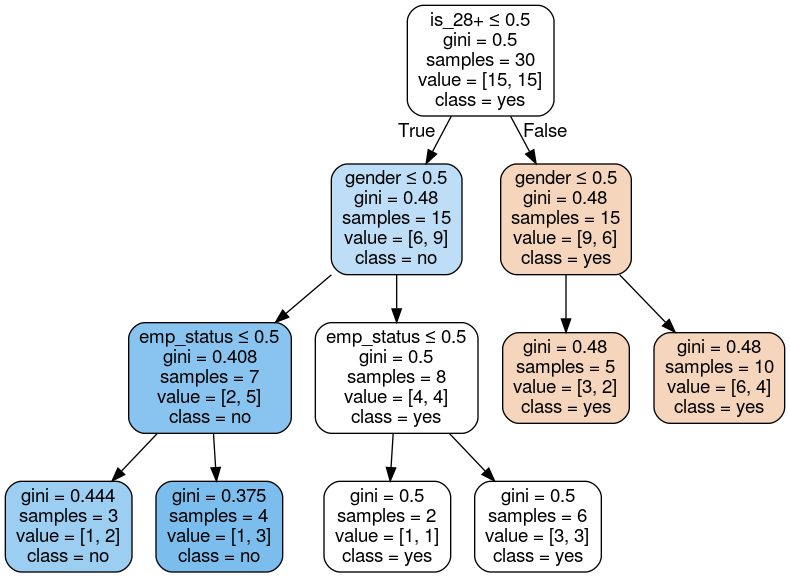

In [51]:
fname = ['gender', 'is_28+', 'emp_status']
cname = ['yes', 'no']

tree.export_graphviz(dt, out_file='tree.dot', filled=True, rounded=True, special_characters=True, feature_names=fname, class_names=cname)
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [39]:
dtc = DecisionTreeClassifier(criterion='entropy')

In [40]:
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
p = dtc.predict(xtest)
p

array(['yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'yes', 'yes'], dtype=object)

In [42]:
accuracy_score(p, ytest)

0.7333333333333333